In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('lqcd') # Custom style for plots used during my PhD
import numpy as np

## Goal

The goal is to find features in the dataset that have a high influence on the survival rate. We use the training dataset to obtain information using standard statistical approaches.

### 1. Feature: Sex


In [2]:
# load the data

td = pd.read_csv('data/train.csv')
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
count = [td['Sex'][td['Sex'] == v].count() for v in ['male', 'female']]

total = len(td)

print(f"Total number of passengers (in training set): \t{total}"
      f"\nNumber of male passengers: \t{count[0]}\t({count[0]/total*100:.1f}%)"
      f"\nNumber of female passengers: \t{count[1]}\t({count[1]/total*100:.1f}%)")


Total number of passengers (in training set): 	891
Number of male passengers: 	577	(64.8%)
Number of female passengers: 	314	(35.2%)


In [4]:
pd.crosstab(td['Sex'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


**Conclusion:**
Being a woman increased the likelihood of survival.

### 2. Feature: Pclass

Text(0, 0.5, 'Fraction of passengers')

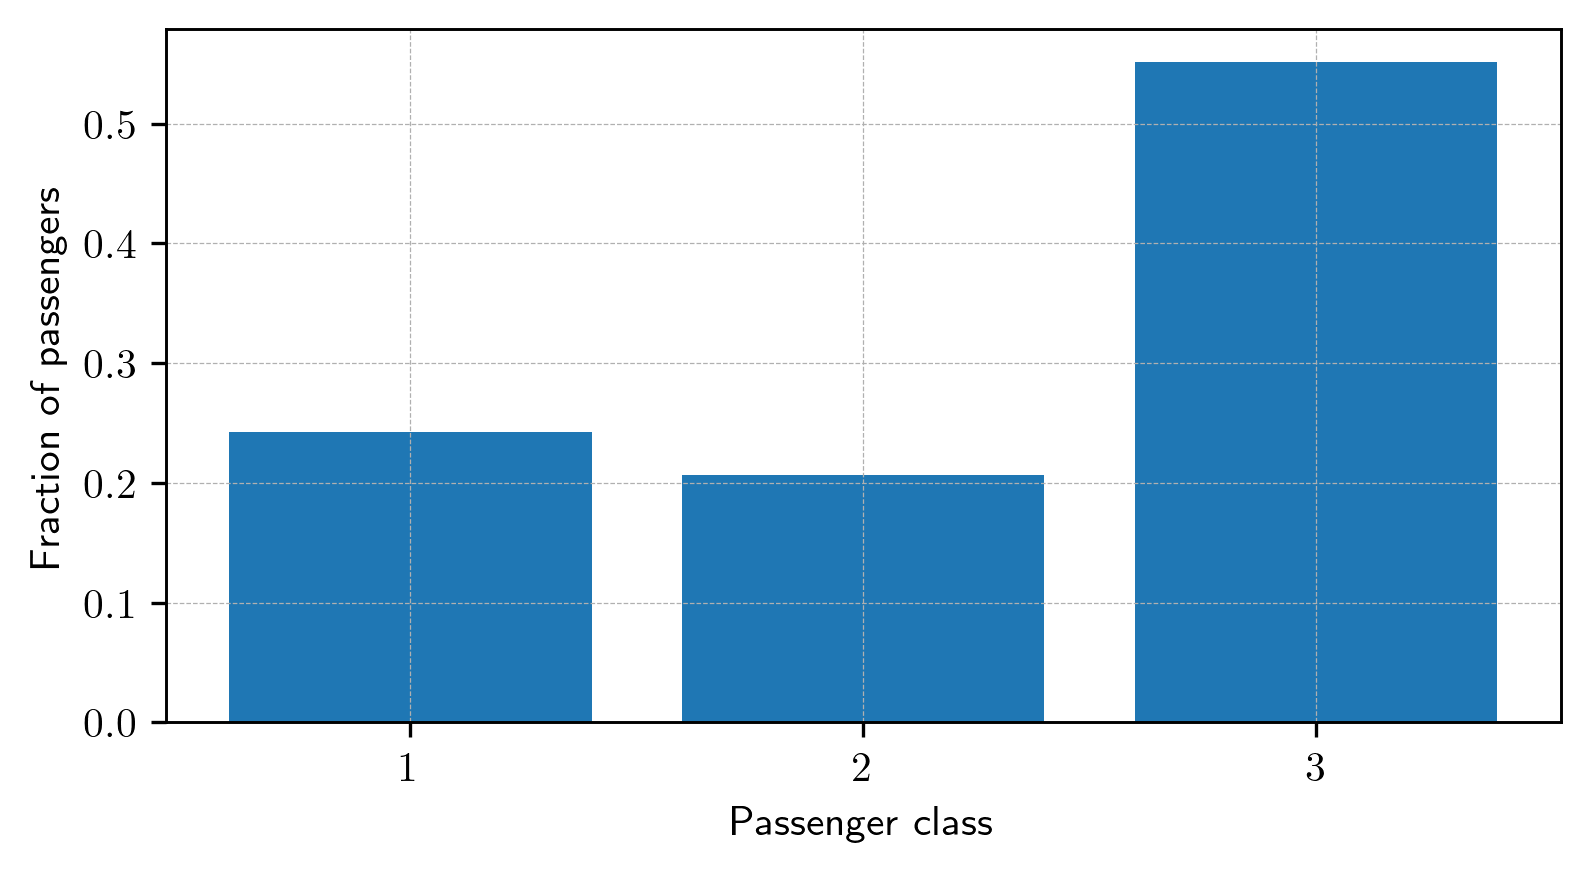

In [5]:
u_classes = np.unique(td['Pclass'].to_numpy())
count = np.array([td['Pclass'][td['Pclass'] == v].count() for v in u_classes])

fig, ax = plt.subplots()
ax.bar(u_classes, count/total)
ax.set_xticks(u_classes)
ax.set_xlabel('Passenger class')
ax.set_ylabel('Fraction of passengers')

In [6]:
pd.crosstab(td['Pclass'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


**Conclusion:**
Being in a better class increased the likelihood of survival.

### 3. Feature: Age

In [7]:
age_array = td['Age'].to_numpy()
print(f"number of NaN entries in Age: {np.sum(np.isnan(age_array))} out of {len(age_array)}  ({np.sum(np.isnan(age_array))/len(age_array)*100:.1f}%)")

print(f"Mean age: {np.nanmean(age_array):.1f} years")
print(f"Median age: {np.nanmedian(age_array):.1f} years")
print(f"Youngest passenger: {np.nanmin(age_array):.1f} years")
print(f"Oldest passenger: {np.nanmax(age_array):.1f} years")

number of NaN entries in Age: 177 out of 891  (19.9%)
Mean age: 29.7 years
Median age: 28.0 years
Youngest passenger: 0.4 years
Oldest passenger: 80.0 years


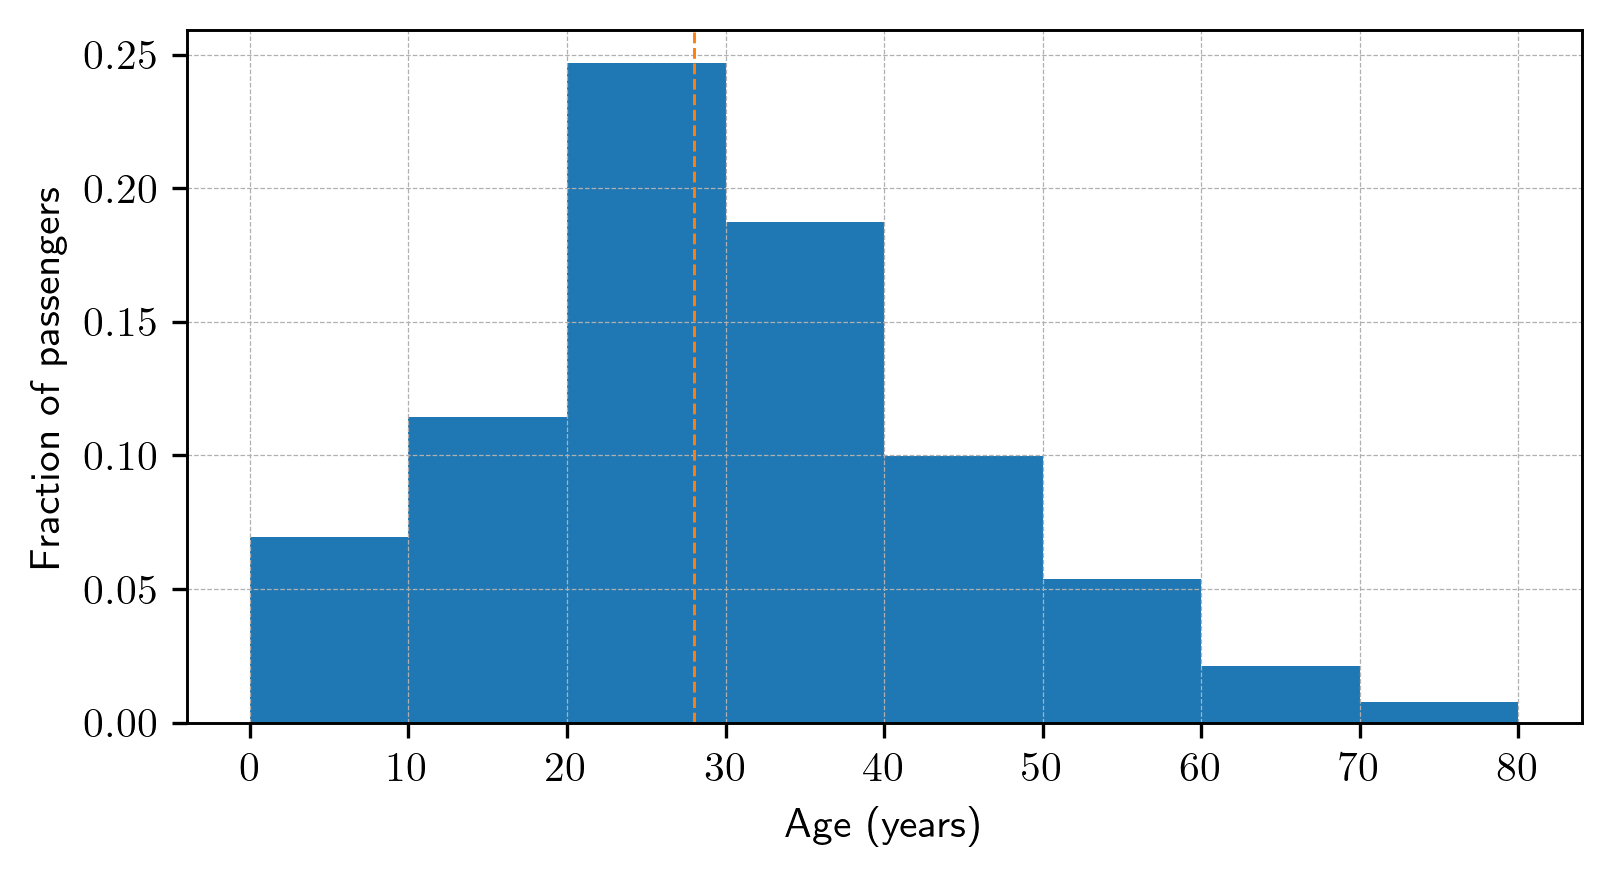

In [8]:
# age distirbution

age_bins = np.arange(0, 81, 10)
age_hist, _ = np.histogram(age_array[~np.isnan(age_array)], bins=age_bins)

fig, ax = plt.subplots()
ax.bar(age_bins[:-1], age_hist/total, width=10, align='edge')
ax.set_xticks(age_bins)
ax.set_xlabel('Age (years)')
ax.set_ylabel('Fraction of passengers')

ax.axvline(np.nanmedian(age_array), color='C1', ls='--', label='Mean age')

We could guess the age of people without an age entry to be the average age, estimate their age using the probability distribution above, or just ignore these entries in the training. The problem with the latter is that we would lose around 20% of the training data. However, we can use the names in the passenger list to make an educated guess.

Title: Mr. , number of passengers without age entry: 119, mean age: 32.3 years
Title: Mrs. , number of passengers without age entry: 17, mean age: 35.9 years
Title: Miss., number of passengers without age entry: 36, mean age: 21.8 years
Title: Master., number of passengers without age entry: 4, mean age: 4.6 years
Title: Dr., number of passengers without age entry: 1, mean age: 39.4 years


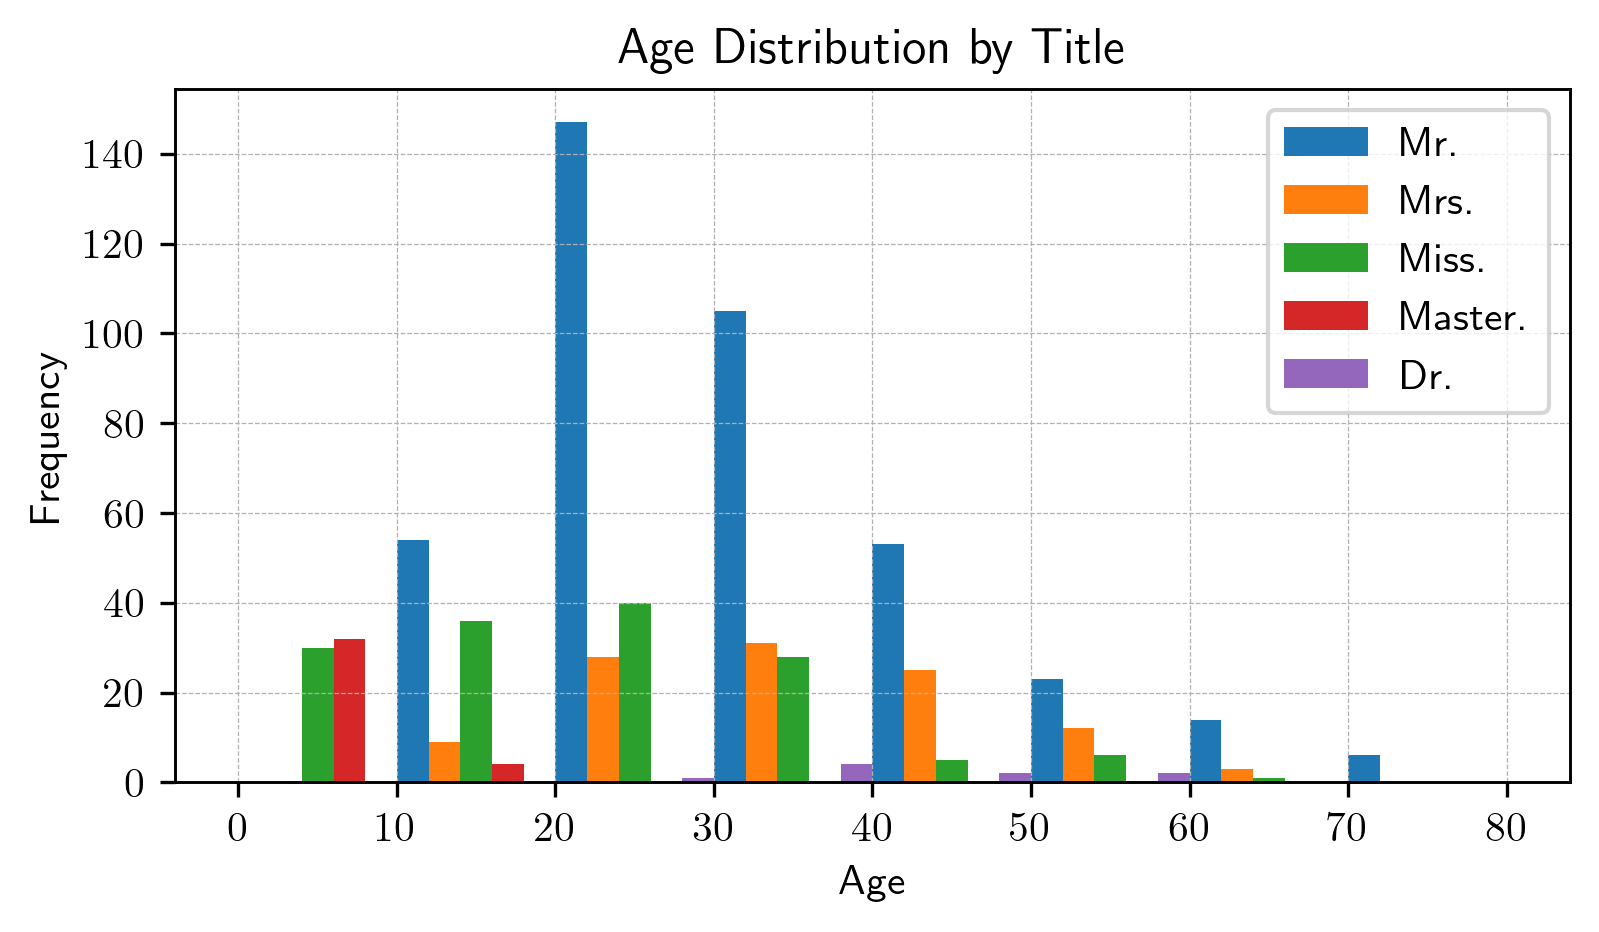

In [9]:
# there are five different titles in the name list of people without an age entry
titles = ['Mr. ', 'Mrs. ', 'Miss.', 'Master.', 'Dr.']
name_list_no_age = td['Name'][np.isnan(td['Age'])].to_list()



mean_ages = []
fig, ax = plt.subplots()

for j, title in enumerate(titles):
    age_ = age_array[~np.isnan(age_array) & td['Name'].str.contains(title)]
    age_hist_, _ = np.histogram(age_, bins=age_bins)
    ax.bar(age_bins[:-1]+j*2, age_hist_, width=2, align='edge', label=title)
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    print(f"Title: {title}, number of passengers without age entry: {np.sum([title in name for name in name_list_no_age])}, mean age: {np.mean(age_):.1f} years")
    mean_ages.append(np.mean(age_))
ax.set_title('Age Distribution by Title')
ax.legend()

sf = pd.DataFrame({'Titles': titles, 'Mean Age': mean_ages})
sf.to_csv('data/title_mean_ages.csv', index=False)

In [10]:
x_age = td['Age'].to_numpy() // 10 * 10
x_age[np.isnan(x_age)] = -1  # use -1 for NaN entries


pd.crosstab(x_age, td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
row_0,,
-1.000000,0.706215,0.293785
0.000000,0.387097,0.612903
10.000000,0.598039,0.401961
20.000000,0.650000,0.350000
30.000000,0.562874,0.437126
40.000000,0.617978,0.382022
50.000000,0.583333,0.416667
60.000000,0.684211,0.315789
70.000000,1.000000,0.000000


**Conclusion:**

Age is a relevant factor. However, not as relevant as the other features

Text(0, 0.5, 'Fraction of passengers')

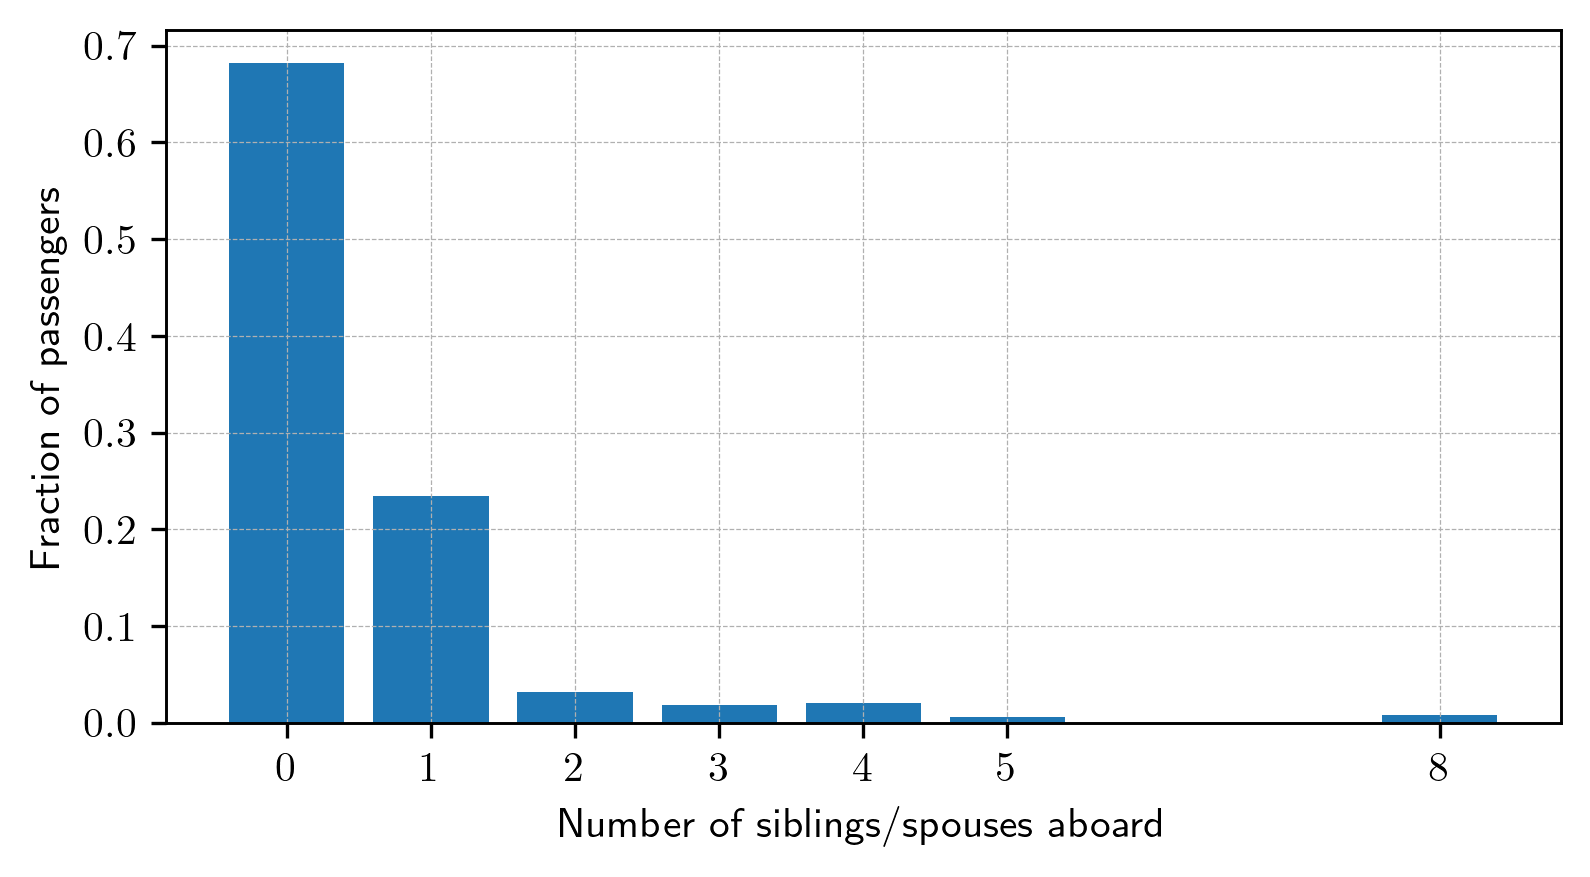

In [11]:
pd.crosstab(td['SibSp'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

unique_sibsp, counts = np.unique(td['SibSp'].to_numpy(), return_counts=True)
fig, ax = plt.subplots()
ax.bar(unique_sibsp, counts/total)
ax.set_xticks(unique_sibsp)
ax.set_xlabel('Number of siblings/spouses aboard')
ax.set_ylabel('Fraction of passengers')

Text(0, 0.5, 'Fraction of passengers')

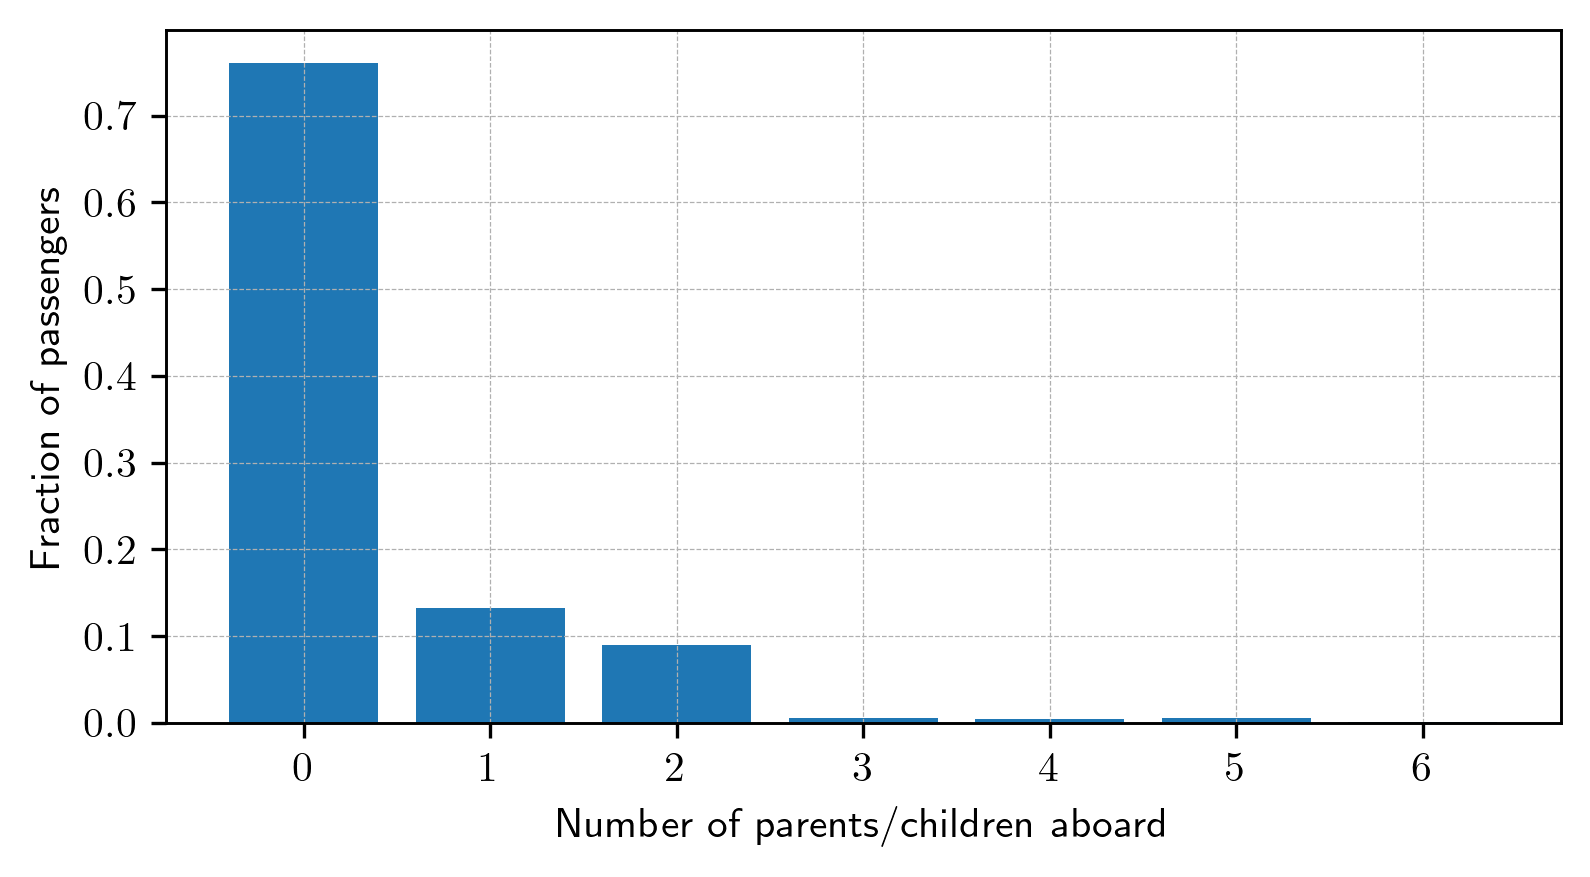

In [12]:
pd.crosstab(td['Parch'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

unique_parch, counts = np.unique(td['Parch'].to_numpy(), return_counts=True)
fig, ax = plt.subplots()
ax.bar(unique_parch, counts/total)
ax.set_xticks(unique_parch)
ax.set_xlabel('Number of parents/children aboard')
ax.set_ylabel('Fraction of passengers')

Text(0, 0.5, 'Fraction of passengers')

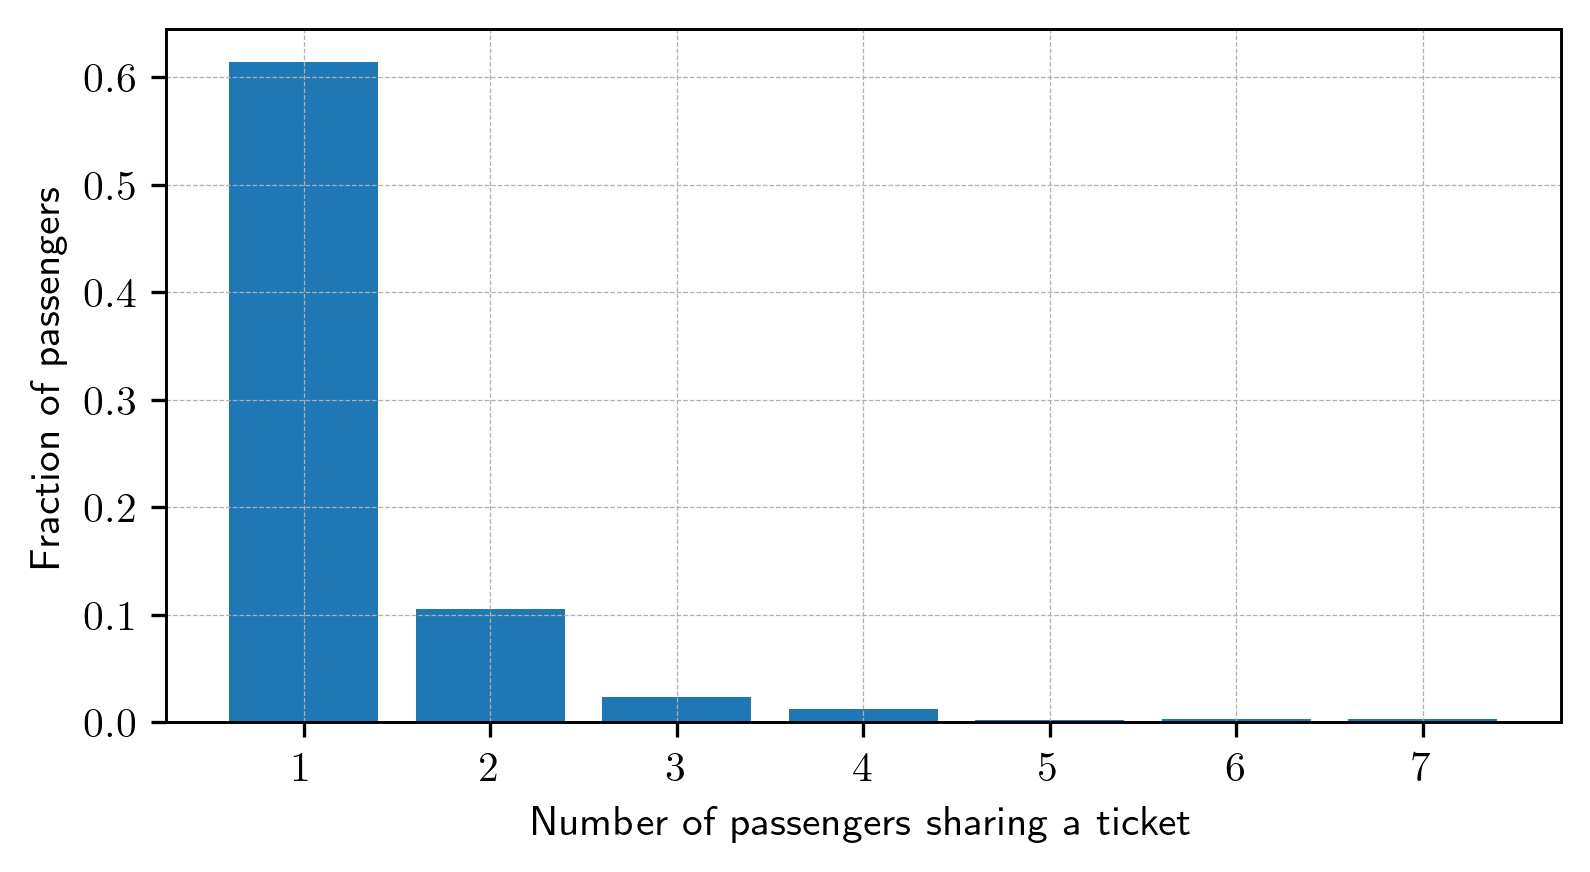

In [13]:
tickets = td['Ticket'].to_numpy()
unique_tickets, counts = np.unique(tickets, return_counts=True)  # some tickets are used by multiple passengers

shared_ticket_nr, shared_ticket_counts = np.unique(counts, return_counts=True)

fig, ax = plt.subplots()
ax.bar(shared_ticket_nr, shared_ticket_counts/total)
ax.set_xticks(shared_ticket_nr)
ax.set_xlabel('Number of passengers sharing a ticket')
ax.set_ylabel('Fraction of passengers')

In [14]:
uniqueness = []
count = 0
for ticket in tickets:
    i = list(unique_tickets).index(ticket)
    if counts[i] > 1:
        uniqueness.append(0)
        count += 1
    else:
        uniqueness.append(1)
print(f"{count} passengers share a ticket with other passengers. This is {count/len(tickets)*100:.1f} % of all passengers.")
pd.crosstab(uniqueness, td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

344 passengers share a ticket with other passengers. This is 38.6 % of all passengers.


Survived,0,1
row_0,,
0,0.479651,0.520349
1,0.702011,0.297989


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_22042/3409306059.py:4: SyntaxWarning: invalid escape sequence '\$'
  ax.set_xlabel('Fare (in \$)')


Text(0, 0.5, 'Probability density')

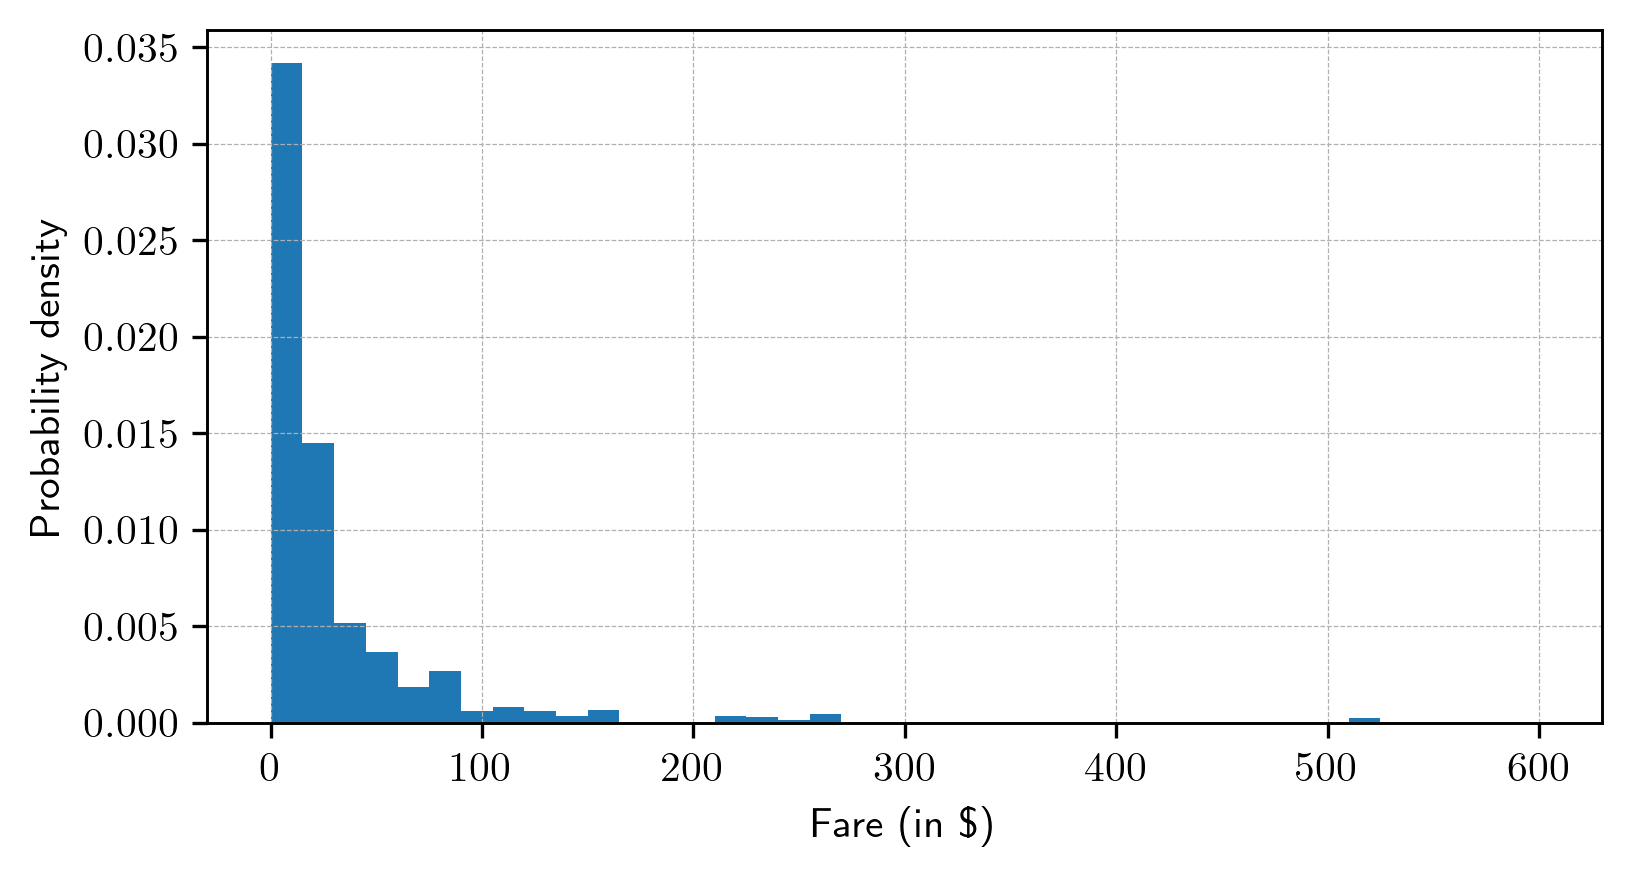

In [15]:
x_fare = td['Fare'].to_numpy()
fig, ax = plt.subplots()
ax.hist(x_fare, bins=40, range=(0, 600), density=True)
ax.set_xlabel('Fare (in \$)')
ax.set_ylabel('Probability density')

In [16]:
td['FareClass'] = np.log10(np.maximum(td['Fare'], 1))//1 * 1

pd.crosstab(td['FareClass'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')


Survived,0,1
FareClass,,
0.000000,0.800595,0.199405
1.000000,0.529880,0.470120
2.000000,0.264151,0.735849


In [17]:
td['KnownCabin'] = ~td['Cabin'].isna()

pd.crosstab(td['KnownCabin'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
KnownCabin,,
False,0.700146,0.299854
True,0.333333,0.666667


In [18]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareClass',
       'KnownCabin'],
      dtype='object')

In [19]:
pd.crosstab(td['Embarked'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


In [20]:
td["FamilySize"] = td["SibSp"] + td["Parch"] + 1  # add one to include the passenger themselves

td["IsAlone"] = (td["FamilySize"] == 1).astype(int)

pd.crosstab(td['IsAlone'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
IsAlone,,
0,0.494350,0.505650
1,0.696462,0.303538


In [31]:
# get titles from names

td['Title'] = td['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

td['Title'].value_counts()

title_groups = ["Mr", "Miss", "Mrs", "Master", "Other"]

td['TitleGroup'] = td['Title'].replace(["Dr", "Col", "Rev", "Mlle", "Major", "Ms", "Mme", "Don", "Sir", "Lady", "Capt", "Jonkheer", "Countess"], 'Other')

td['TitleGroup'].value_counts()


TitleGroup
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [32]:
pd.crosstab(td['TitleGroup'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
TitleGroup,,
Master,0.425000,0.575000
Miss,0.302198,0.697802
Mr,0.843327,0.156673
Mrs,0.208000,0.792000
Other,0.555556,0.444444


In [35]:
td["Age"] = td.groupby("TitleGroup")["Age"].transform(lambda x: x.fillna(x.median()))

In [36]:
td['Age'].isna().sum()  # check that there are no NaN entries left

np.int64(0)

In [42]:
td["CabinGroup"] = td["Cabin"].str[0].fillna("U")  # take first letter of cabin
td['CabinGroup'].value_counts()

CabinGroup
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [43]:
td['CabinPresent'] = (td['Cabin'].notna()).astype(int)
td['CabinPresent'].value_counts()

CabinPresent
0    687
1    204
Name: count, dtype: int64

In [44]:
pd.crosstab(td['CabinPresent'], td['Survived'], normalize='index').style.background_gradient(cmap='summer_r')

Survived,0,1
CabinPresent,,
0,0.700146,0.299854
1,0.333333,0.666667


In [45]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareClass',
       'KnownCabin', 'FamilySize', 'IsAlone', 'Title', 'TitleGroup',
       'CabinGroup', 'CabinPresent'],
      dtype='object')

In [49]:
td['Embarked'] = td['Embarked'].fillna('S')  # fill NaN entries with most common value

In [50]:
for column in td.columns:
    print(f"{column}: {td[column].isna().sum()} NaN entries")

PassengerId: 0 NaN entries
Survived: 0 NaN entries
Pclass: 0 NaN entries
Name: 0 NaN entries
Sex: 0 NaN entries
Age: 0 NaN entries
SibSp: 0 NaN entries
Parch: 0 NaN entries
Ticket: 0 NaN entries
Fare: 0 NaN entries
Cabin: 687 NaN entries
Embarked: 0 NaN entries
FareClass: 0 NaN entries
KnownCabin: 0 NaN entries
FamilySize: 0 NaN entries
IsAlone: 0 NaN entries
Title: 0 NaN entries
TitleGroup: 0 NaN entries
CabinGroup: 0 NaN entries
CabinPresent: 0 NaN entries


In [ ]:
td.to_cs